In [355]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [356]:
import pandas as pd

#### Importando o dataset

In [357]:
df_train = pd.read_csv('./titanic_data/train.csv')
df_test = pd.read_csv('./titanic_data/test.csv')

In [358]:
df_train.shape

(891, 12)

In [359]:
df_test.shape

(418, 11)

In [360]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [361]:
df_test = df_test.dropna()

In [362]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87 entries, 12 to 414
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  87 non-null     int64  
 1   Pclass       87 non-null     int64  
 2   Name         87 non-null     object 
 3   Sex          87 non-null     object 
 4   Age          87 non-null     float64
 5   SibSp        87 non-null     int64  
 6   Parch        87 non-null     int64  
 7   Ticket       87 non-null     object 
 8   Fare         87 non-null     float64
 9   Cabin        87 non-null     object 
 10  Embarked     87 non-null     object 
dtypes: float64(2), int64(4), object(5)
memory usage: 8.2+ KB


In [363]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Verificando os tipos de dados e valores NaN

In [364]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Substituindo valores NaN em features relevantes
- Age e embarked vão ser preenchido com a média dos valores
- A coluna Name, Cabin e ticket serão apagadas pois os valores são pouco relevantes

In [365]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(value=mean_age, inplace=True)

In [366]:
mean_embarked = df_train['Embarked'].mode().values[0]
df_train['Embarked'].fillna(value=mean_embarked, inplace=True)

In [367]:
df_train.drop(columns=['Cabin','Name'], inplace=True)

In [368]:
df_train.drop(columns=['Ticket'], inplace=True)

In [369]:
df_test.drop(columns=['Cabin','Name','Ticket'], inplace=True)

In [370]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


#### Convertendo a coluna 'sex' para valores binários

In [371]:
df_train['Sex'] = df_train['Sex'].apply({'male':1,'female':0}.get)
df_test['Sex'] = df_test['Sex'].apply({'male':1,'female':0}.get)

#### Convertendo a coluna 'embarked' para valores numéricos

In [372]:
df_train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [373]:
embarked_map = {'S': 0, 'C': 1, 'Q':2}
df_train['Embarked']  = df_train['Embarked'].map(embarked_map)

In [374]:
df_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


#### Separando a coluna de rótulos

In [375]:
train_data = df_train.drop(columns=['Survived'])
train_labels = df_train['Survived']

#### Separando uma parte dos dados de treino para validação

In [376]:
(train_data, val_data, train_labels, val_labels) = train_test_split(train_data, train_labels,
test_size=0.1, random_state=84)

In [377]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_data, train_labels)

DecisionTreeClassifier(max_depth=3, random_state=42)

#### Calculando a acurácia

In [378]:
y_pred = dt.predict(val_data)
accuracy_score(val_labels, y_pred)

0.7888888888888889

In [379]:
print(classification_report(val_labels, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        58
           1       0.74      0.62      0.68        32

    accuracy                           0.79        90
   macro avg       0.78      0.75      0.76        90
weighted avg       0.79      0.79      0.78        90



#### Verificando a importância de cada feature

In [380]:
dt.feature_importances_

array([0.        , 0.15425689, 0.60960338, 0.06054176, 0.07467612,
       0.        , 0.10092185, 0.        ])

In [381]:
from sklearn import tree

[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.474\nsamples = 801\nvalue = [491, 310]'),
 Text(0.25, 0.625, 'X[1] <= 2.5\ngini = 0.377\nsamples = 286\nvalue = [72, 214]'),
 Text(0.125, 0.375, 'X[3] <= 2.5\ngini = 0.086\nsamples = 156\nvalue = [7, 149]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.075\nsamples = 154\nvalue = [6, 148]'),
 Text(0.375, 0.375, 'X[6] <= 23.35\ngini = 0.5\nsamples = 130\nvalue = [65, 65]'),
 Text(0.3125, 0.125, 'gini = 0.484\nsamples = 105\nvalue = [43, 62]'),
 Text(0.4375, 0.125, 'gini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.75, 0.625, 'X[3] <= 13.0\ngini = 0.303\nsamples = 515\nvalue = [419, 96]'),
 Text(0.625, 0.375, 'X[4] <= 2.5\ngini = 0.489\nsamples = 33\nvalue = [14, 19]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'X[6] <= 26.269\ngini = 0.268\nsamples = 482\nvalue = [405, 77]'),
 Te

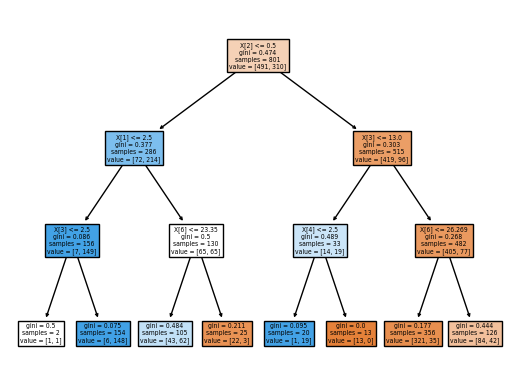

In [382]:
tree.plot_tree(dt, filled=True)

#### Selecionando os melhores atributos

In [383]:
df = pd.DataFrame(dt.feature_importances_)
df  = df[ df[0] > 0.01 ]

In [384]:
df

,0
1,0.154257
2,0.609603
3,0.060542
4,0.074676
6,0.100922


In [385]:
idx = df[ df[0] > 0.01 ].index
idx.values

array([1, 2, 3, 4, 6], dtype=int64)

In [386]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_data.iloc[:,idx],train_labels)
y_pred = dt.predict(val_data.iloc[:,idx])
accuracy_score(val_labels, y_pred)

0.7888888888888889

In [387]:
y_pred = dt.predict(df_test.iloc[:,idx])
y_pred

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1],
      dtype=int64)

[Text(0.5, 0.875, 'X[1] <= 0.5\ngini = 0.474\nsamples = 801\nvalue = [491, 310]'),
 Text(0.25, 0.625, 'X[0] <= 2.5\ngini = 0.377\nsamples = 286\nvalue = [72, 214]'),
 Text(0.125, 0.375, 'X[2] <= 2.5\ngini = 0.086\nsamples = 156\nvalue = [7, 149]'),
 Text(0.0625, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1875, 0.125, 'gini = 0.075\nsamples = 154\nvalue = [6, 148]'),
 Text(0.375, 0.375, 'X[4] <= 23.35\ngini = 0.5\nsamples = 130\nvalue = [65, 65]'),
 Text(0.3125, 0.125, 'gini = 0.484\nsamples = 105\nvalue = [43, 62]'),
 Text(0.4375, 0.125, 'gini = 0.211\nsamples = 25\nvalue = [22, 3]'),
 Text(0.75, 0.625, 'X[2] <= 13.0\ngini = 0.303\nsamples = 515\nvalue = [419, 96]'),
 Text(0.625, 0.375, 'X[3] <= 2.5\ngini = 0.489\nsamples = 33\nvalue = [14, 19]'),
 Text(0.5625, 0.125, 'gini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),
 Text(0.875, 0.375, 'X[4] <= 26.269\ngini = 0.268\nsamples = 482\nvalue = [405, 77]'),
 Te

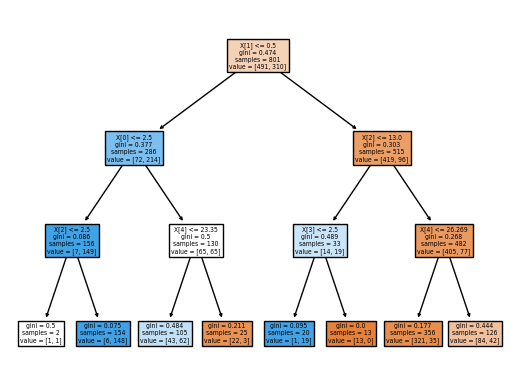

In [388]:
tree.plot_tree(dt, filled=True)